### Classification
* Finds probability of the email being spam if the work is present in the mail
* It finds this probability for every words. 
* And, finds cumlative probability of the complete mail being spam.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

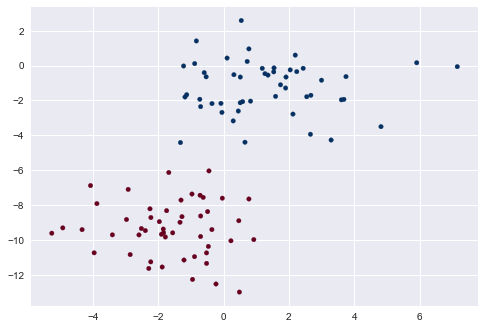

In [11]:
from sklearn.datasets import make_blobs

#Data Generator
#Number of features - 2

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
#print(X)
#print(y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu');
#help(make_blobs)

#import pandas as pd
#pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'class':y}).head()

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X, y);

In [17]:
help(MultinomialNB)

Help on class MultinomialNB in module sklearn.naive_bayes:

class MultinomialNB(BaseDiscreteNB)
 |  Naive Bayes classifier for multinomial models
 |  
 |  The multinomial Naive Bayes classifier is suitable for classification with
 |  discrete features (e.g., word counts for text classification). The
 |  multinomial distribution normally requires integer feature counts. However,
 |  in practice, fractional counts such as tf-idf may also work.
 |  
 |  Read more in the :ref:`User Guide <multinomial_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional (default=1.0)
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  fit_prior : boolean, optional (default=True)
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior will be used.
 |  
 |  class_prior : array-like, size (n_classes,), optional (default=None)
 |      Prior probabilities of the classes. If specified the priors are not
 |   

In [14]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
#predict color - 0 or 1
ynew = model.predict(Xnew)

In [25]:
d = rng.rand(2000, 2) * [14,18] 
d.shape

(2000, 2)

In [29]:
ynew

array([1, 1, 1, ..., 0, 1, 1])

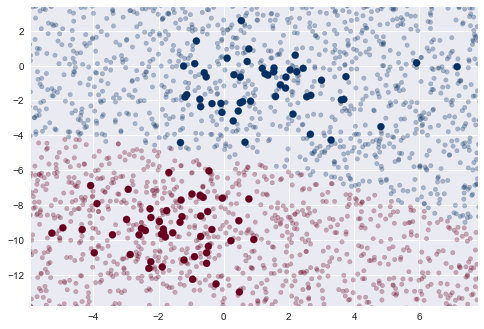

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim);

### Text Classification

In [18]:
from sklearn.datasets import fetch_20newsgroups
#20 newsgroups. And, e
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [23]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics','rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline

In [72]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [44]:
train.target_names[ model.predict(['Jesus'])[0]]

'soc.religion.christian'

In [46]:
train.target_names[ model.predict(['Spaceship is good'])[0]]

'soc.religion.christian'

In [48]:
model.predict(['ISIS is good'])

array([2], dtype=int64)

In [49]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [50]:
predict_category('islam vs argeism')

'soc.religion.christian'

In [53]:
predict_category('planet is inhabitable')

'sci.space'

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

In [73]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [86]:
predict_category('shuttle is god')

'sci.space'

In [20]:
help(fetch_20newsgroups)

Help on function fetch_20newsgroups in module sklearn.datasets.twenty_newsgroups:

fetch_20newsgroups(data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True)
    Load the filenames and data from the 20 newsgroups dataset.
    
    Read more in the :ref:`User Guide <20newsgroups>`.
    
    Parameters
    ----------
    subset : 'train' or 'test', 'all', optional
        Select the dataset to load: 'train' for the training set, 'test'
        for the test set, 'all' for both, with shuffled ordering.
    
    data_home : optional, default: None
        Specify a download and cache folder for the datasets. If None,
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    categories : None or collection of string or unicode
        If None (default), load all the categories.
        If not None, list of category names to load (other categories
        ignored).
    
    shuffle : bool, optional
      